[*********************100%***********************]  5 of 5 completed


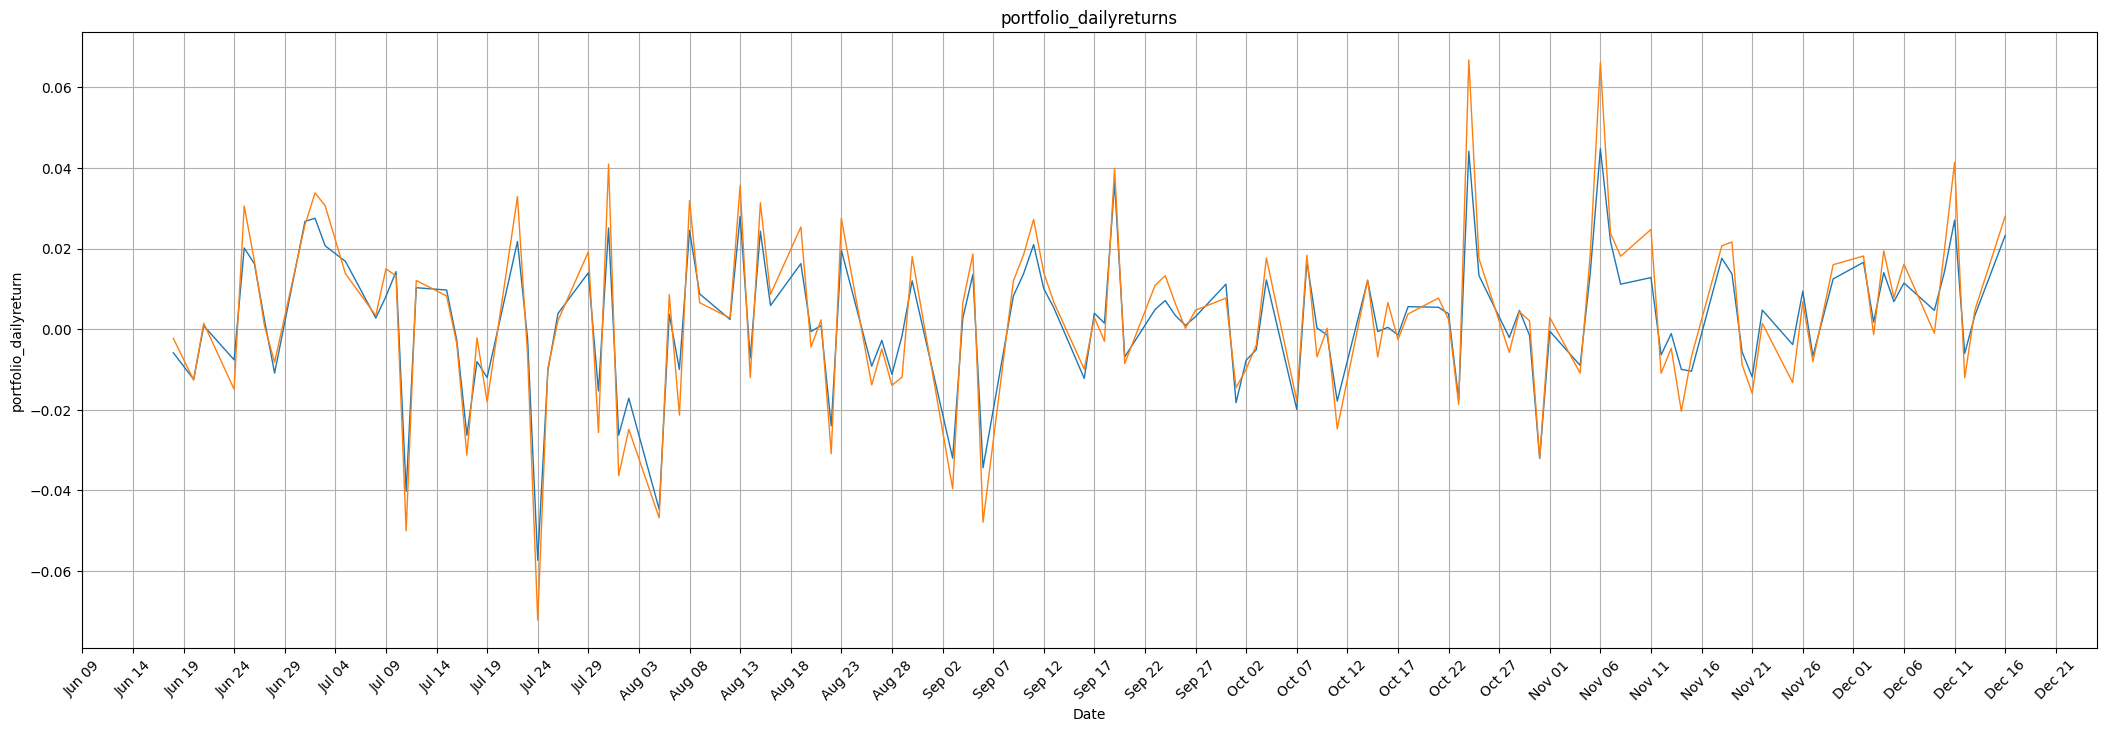

final value of portfolio is : 131421.89716253738
final value of portfolio is : 141953.7672612994


In [7]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
#taking inputs
tickers = ['AAPL','MSFT','GOOGL','TSLA','NVDA']
weights_1=[0.3, 0.2, 0.2, 0.2, 0.1]
weights_2=[0.1, 0.1, 0.3, 0.3, 0.2]

data = yf.download(tickers, period='6mo' , interval='1d')

for ticker in tickers:
  data[f'{ticker}_Daily_Return'] = data['Adj Close'][ticker].pct_change()

data['portfolio_dailyreturn_1'] = 0
data['portfolio_dailyreturn_2'] = 0

for i in range(len(weights_1)):
  data['portfolio_dailyreturn_1'] += weights_1[i] * data[f'{tickers[i]}_Daily_Return']
for i in range(len(weights_2)):
  data['portfolio_dailyreturn_2'] += weights_2[i] * data[f'{tickers[i]}_Daily_Return']


plt.figure(figsize=(26, 8))

plt.plot(data.index,data['portfolio_dailyreturn_1'],linewidth='1',markersize=20,)
plt.plot(data.index,data['portfolio_dailyreturn_2'],linewidth='1',markersize=20,)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.ylabel('portfolio_dailyreturn')
plt.xlabel('Date')
plt.title('portfolio_dailyreturns')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


data['cumulative_returns_1'] = (1 + data['portfolio_dailyreturn_1']).cumprod()

final_portfolio_value_1 = 100000 * data['cumulative_returns_1'].iloc[-1]
print("final value of portfolio is :",final_portfolio_value_1)

data['cumulative_returns_2'] = (1 + data['portfolio_dailyreturn_2']).cumprod()

final_portfolio_value_2 = 100000 * data['cumulative_returns_2'].iloc[-1]
print("final value of portfolio is :",final_portfolio_value_2)



print("Since final value of portfolio_2 is more than value of portfolio_1.Hence 2nd weight distribution is better way of dividing assets")
